In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from math import sqrt

In [110]:
def exp(tau):
    return -tau*np.log(1-np.random.uniform())

In [111]:
def pdf(N,t0):
    return np.array([exp(t0) for i in range(N)])

Plotting the exponentially distributed data

(array([551., 240., 105.,  46.,  32.,  16.,   5.,   3.,   1.,   1.]),
 array([2.87562291e-03, 3.77707244e+00, 7.55126925e+00, 1.13254661e+01,
        1.50996629e+01, 1.88738597e+01, 2.26480565e+01, 2.64222533e+01,
        3.01964501e+01, 3.39706470e+01, 3.77448438e+01]),
 <BarContainer object of 10 artists>)

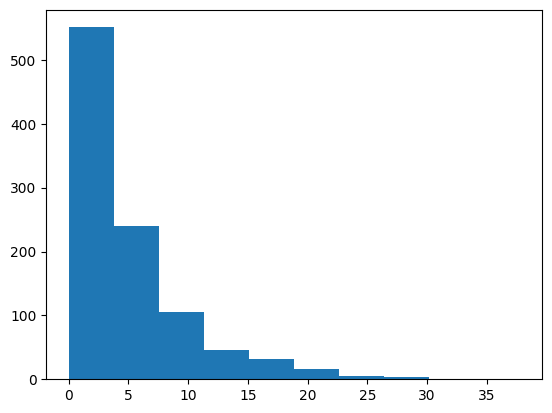

In [112]:
N = 1000
t0 = 5

dati = pdf(N,t0)

plt.hist(dati,bins=10)

Comparing likelihoods with different data sizes

In [113]:
def likelihood(dati,t):
    return np.prod([np.exp(-i/t)/t for i in dati])

In [114]:
def loglikelihood(dati,t):
    return np.sum([np.log(np.exp(-i/t)/t) for i in dati])

In [115]:
t_range = np.linspace(1,100,1000) #range of t0 values

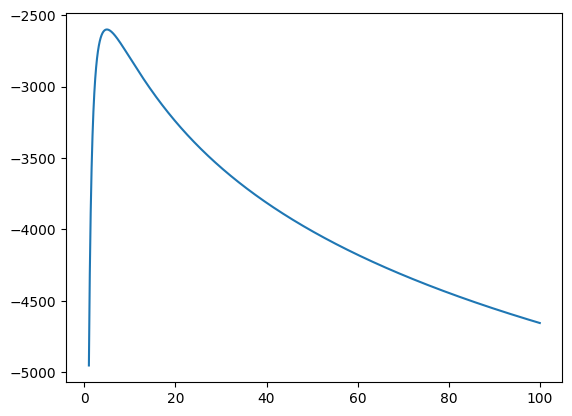

In [116]:
logLike = [loglikelihood(dati,t) for t in t_range]

plt.plot(t_range,logLike)

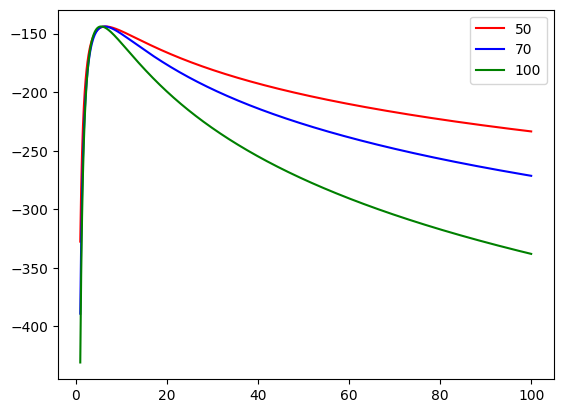

In [117]:
like1 = [loglikelihood(dati[:50],t) for t in t_range]
like2 = [loglikelihood(dati[:70],t) for t in t_range]
like3 = [loglikelihood(dati[:100],t) for t in t_range]

m1 = max(like1)
m2 = m1-max(like2)
m3 = m1-max(like3)

like2 = [i+m2 for i in like2]
like3 = [i+m3 for i in like3]

plt.plot(t_range,like1,c='red',label=50)
plt.plot(t_range,like2,c='blue',label=70)
plt.plot(t_range,like3,c='green',label=100)
plt.legend()

In [118]:
def min(sample):

    m = sample[0]
    
    for i in sample:
        if i < m:   m = i
    return m

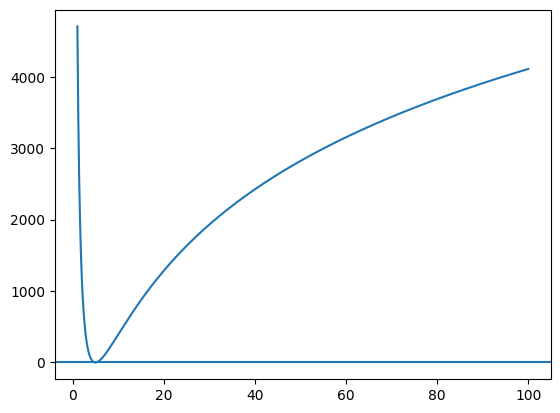

In [120]:
t_range = np.linspace(1,100,1000) #range of t0 values

l = [-2*loglikelihood(dati,t) for t in t_range]

m = min(l)

l = [(i-m) for i in l]

plt.plot(t_range,l)
plt.axhline(2)